In [2]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

# Part I. Short Answers

### 1.  Data Locality: Describe how the concept of data locality contributes to making Hadoop perform well.

<p> Data locality is the process of moving computation closer to where the actual data resides on the node, instead of moving the large data set somewhere for further processing.</p>

<p> In a non-Hadoop or more traditional data warehouse environment, something like an ETL batch job would run and transform the data into a more structured database.  A user would then execute requests against the location of the data using a web interface or query language; the resulting subset would then be transportated yet again to be processed further with another script or programming language.</p>

<p>In Hadoop, the data gets distributed to different nodes, along with the algorithm required to process that data; each node then processes that data locally instead of transporting it to a separate client.</p>

### 2.  Share Nothing: Explain how Hadoop's "shared nothing" architecture contributes to the performance of Hadoop in parallel computing.

<p>Hadoop's "shared nothing" architecture makes it so there is no dependency between clusters or processes. They all execute in parallel and since they do not need to communicate during the mapping step, the execution is streamlined.  Data is distributed in blocks instead of all at once; anything that needs to be executed against the entire dataset can be performed on each node locally so the order of which tasks are executed is not important.</p>

### 3. Understand MapReduce: Suppose you have a big text file in HDFS that contains order_ID,employee_name, and sale_amount, separated by commas. You goal is to calculate sum of all sales by employees. Using this task as an example, describe how Hadoop MapReduce carries out such a task, including what steps are involved, what are their input and output, when is data read from disk, written to disk, and sent between nodes. When does parallel processing occur?

In [ ]:
0,3625,Alice
1,5174,Bob
2,893,Alice
3,2139,Alice
4,3581,Diana
5,1039,Carlos
6,4823,Bob
7,5834,Alice
8,392,Carlos
9,1804,Diana

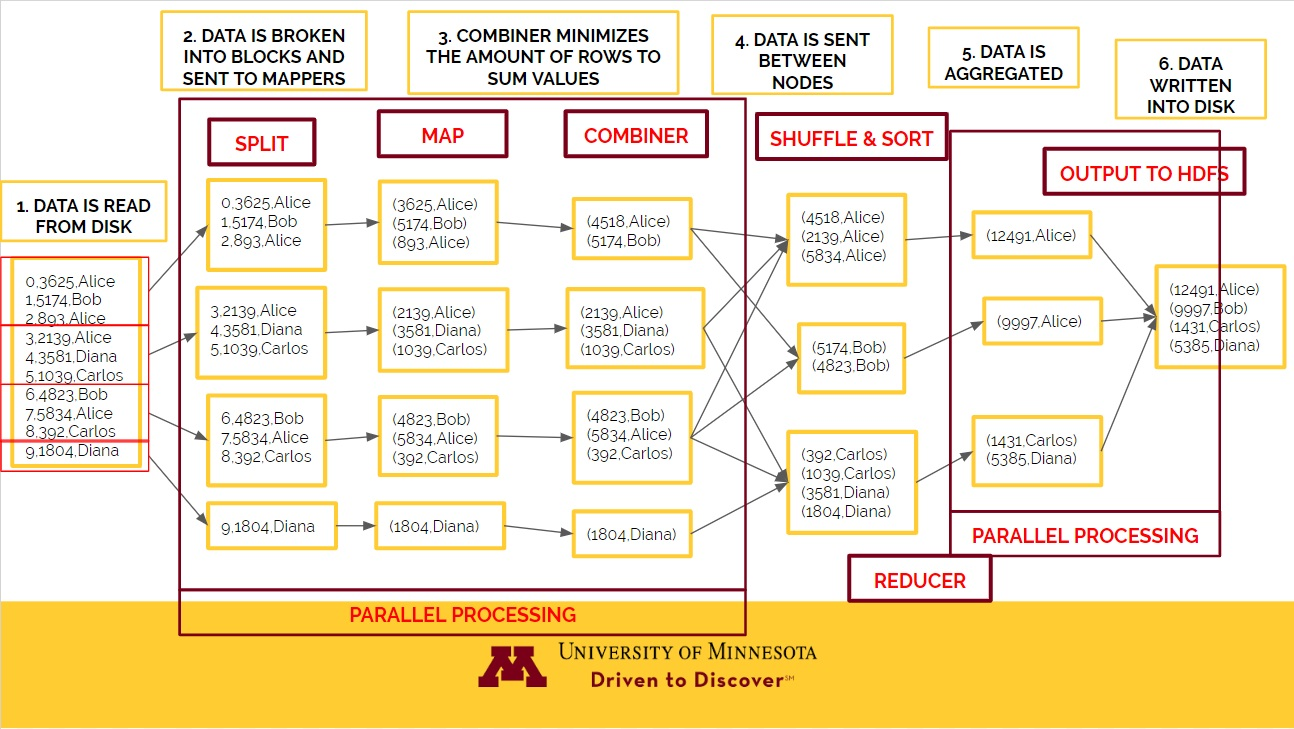

In [10]:
#PATH = "C:/Users/monca016/Downloads"
#Image(filename = PATH + "/shortanswer3.jpg", width=1000, height=1000)

# Part II. Hands-On

## A. Using Sqoop for Data Ingestion from Relational Database

In [ ]:
# 1. Using the MySQL command line interface to log on to the movielens database (the user name is root and the password is cloudera).

[cloudera@quickstart data]$ mysql -uroot -pcloudera movielens
Reading table information for completion of table and column names
You can turn off this feature to get a quicker startup with -A

Welcome to the MySQL monitor.  Commands end with ; or \g.
Your MySQL connection id is 556
Server version: 5.1.73 Source distribution

Copyright (c) 2000, 2013, Oracle and/or its affiliates. All rights reserved.

Oracle is a registered trademark of Oracle Corporation and/or its
affiliates. Other names may be trademarks of their respective
owners.

Type 'help;' or '\h' for help. Type '\c' to clear the current input statement.

mysql>


# 2. Describe the movie table and report the first five rows of this table. [Report Result]

mysql> DESCRIBE movie;

+-------+-------------+------+-----+---------+-------+
| Field | Type        | Null | Key | Default | Extra |
+-------+-------------+------+-----+---------+-------+
| id    | int(11)     | NO   | PRI | 0       |       |
| name  | char(75)    | YES  |     | NULL    |       |
| year  | smallint(6) | YES  |     | NULL    |       |
+-------+-------------+------+-----+---------+-------+
3 rows in set (0.00 sec)

mysql> SELECT * FROM movie LIMIT 5;

+----+-----------------------------+------+
| id | name                        | year |
+----+-----------------------------+------+
|  1 | Toy Story                   | 1995 |
|  2 | Jumanji                     | 1995 |
|  3 | Grumpier Old Men            | 1995 |
|  4 | Waiting to Exhale           | 1995 |
|  5 | Father of the Bride Part II | 1995 |
+----+-----------------------------+------+
5 rows in set (0.00 sec)

# 3. Using sqoop to import the movie table from movielens database into HDFS's /movielens/movie, the fields should be terminated by tab \t. [Answer: how many rows were imported]

[cloudera@quickstart data]$ hadoop fs -mkdir /movielens

[cloudera@quickstart data]$ sqoop import --connect jdbc:mysql://localhost/movielens --username root --password cloudera --fields-terminated-by '\t' --warehouse-dir /movielens/movie --table movie

19/06/15 14:33:56 INFO mapreduce.ImportJobBase: Transferred 99.6602 KB in 67.6912 seconds (1.4723 KB/sec)
19/06/15 14:33:56 INFO mapreduce.ImportJobBase: Retrieved 3881 records.

# 4. Show the files in the /movielens/movie folder on HDFS [Report Result]

[cloudera@quickstart data]$ hadoop fs -ls /movielens/movie
Found 5 items
-rw-r--r--   1 cloudera supergroup          0 2019-06-15 15:00 /movielens/movie/_SUCCESS
-rw-r--r--   1 cloudera supergroup      24596 2019-06-15 15:00 /movielens/movie/part-m-00000
-rw-r--r--   1 cloudera supergroup      24740 2019-06-15 15:00 /movielens/movie/part-m-00001
-rw-r--r--   1 cloudera supergroup      26371 2019-06-15 15:00 /movielens/movie/part-m-00002
-rw-r--r--   1 cloudera supergroup      26345 2019-06-15 15:00 /movielens/movie/part-m-00003

# 5. Display last 10 lines of the first data file (the file name usually should be part-m-00000). [Report Result]

[cloudera@quickstart data]$ hadoop fs -cat /movielens/movie/part-m-00000 | tail -10
979     Nothing Personal        1995
980     In the Line of Duty 2   1987
981     Dangerous Ground        1997
982     Picnic  1955
983     Madagascar Skin 1995
984     Pompatus of Love, The   1996
985     Small Wonders   1996
986     Fly Away Home   1996
987     Bliss   1997
988     Grace of My Heart       1996

# 6. Export the content of HDFS folder /movielens/movie to your local file system as a single file $ADIR/data/movie.txt.

[cloudera@quickstart data]$ hadoop fs -getmerge /movielens/movie $ADIR/data/movie.txt

[cloudera@quickstart data]$ ls -al $ADIR/data/
-rw-r--r-- 1 cloudera cloudera    102052 Jun 15 15:09 movie.txt

## B. Run a MapReduce Job using Python

Lab 3 has an example of a MapReduce job written in Python. Modify the Mapper and Reducer code in that exercise to calculate the highest salary in each zip code.
- For this task, report the shell script for submitting the hadoop job and a copy of scripts mapper.py and reducer.py.

# Mapper.py

In [ ]:
#!/usr/bin/env python

import sys

for line in sys.stdin:
   line = line.strip()
   (id, fname, lname, address, city, state, zip, job, email, active, salary) = line.split("\t")

   print "%s,%s" % (zip, salary)

# Reducer.py

In [ ]:
#!/usr/bin/env python

import sys

previous_zip = ''
max_salary = 0

for line in sys.stdin:
    line = line.strip()

    (zip, salary) = line.split(",")

    if zip == previous_zip:
        if max_salary < int(salary):
            max_salary = int(salary)
    else:
        print "%s\t%s" % (previous_zip, max_salary)
        previous_zip = zip
        max_salary = int(salary)

# Runjob.sh

In [ ]:
#!/bin/sh

# Path of Hadoop streaming JAR library
STREAMJAR=/usr/lib/hadoop-mapreduce/hadoop-streaming-2.6.0-cdh5.10.0.jar



# Directory in which we'll store job output
OUTPUT=/user/cloudera/empcounts

# Make sure we don't have output from a previous run.
# The -r option removes the directory recursively, and
# the -f option prevents Hadoop from warning us if the
# directory doesn't exist.
hadoop fs -rm -r -f $OUTPUT

# Run this job
hadoop jar $STREAMJAR \
   -mapper mapper.py -file mapper.py  \
   -reducer reducer.py -file reducer.py  \
   -input /dualcore/employees \
   -output $OUTPUT

When the job is completed, use command(s) to view the first 10 lines of the output and report the results.

In [ ]:
19/06/22 15:55:43 INFO streaming.StreamJob: Output directory: /user/cloudera/empcounts
[cloudera@quickstart bonus_01]$ hadoop fs -getmerge /user/cloudera/empcounts results.txt

[cloudera@quickstart bonus_01]$ head -n 10 results.txt

01001   28093
01002   28372
01003   22664
01007   23426
01009   27699
01020   26080
01021   33083
01030   23049
01032   25238
01057   20879

## C. HDFS Commands

In [3]:
# 1. Create a folder latlon in HDFS

[cloudera@quickstart ~]$ hadoop fs -mkdir latlon

[cloudera@quickstart ~]$ hadoop fs -ls
Found 10 items
drwxrwxrwx   - cloudera cloudera          0 2017-08-02 13:10 2015_11_18
drwxrwxrwx   - cloudera cloudera          0 2017-08-02 13:10 2015_11_19
drwxrwxrwx   - cloudera cloudera          0 2017-08-02 13:10 2015_11_20
drwxrwxrwx   - cloudera cloudera          0 2017-08-02 13:10 2015_11_21
drwxr-xr-x   - cloudera cloudera          0 2017-07-31 23:58 count2
drwxr-xr-x   - cloudera cloudera          0 2017-08-01 03:57 empcounts
drwxr-xr-x   - cloudera cloudera          0 2019-06-14 15:23 latlon

# 2. Navigate to $ADIR/data in the local machine, and put a sample of latlon.tsv (first 1000 rows) into the newly created HDFS folder.

[cloudera@quickstart ~]$ cd $ADIR/data

[cloudera@quickstart data]$ head -n 1000 latlon.tsv | hadoop fs -put - latlon/latlon.tsv

# 3. List the content of the latlon folder in HDFS

[cloudera@quickstart data]$ hadoop fs -ls latlon
Found 1 items
-rw-r--r--   1 cloudera cloudera      26100 2019-06-14 15:29 latlon/latlon.tsv

# 4. Display the first 10 rows of the latlon.tsv in HDFS.

[cloudera@quickstart data]$ hadoop fs -cat latlon/latlon.tsv | head -n 10

#00210   43.005895       -71.013202
#00211   43.005895       -71.013202
#00212   43.005895       -71.013202
#00213   43.005895       -71.013202
#00214   43.005895       -71.013202
#00215   43.005895       -71.013202
#00501   40.922326       -72.637078
#00544   40.922326       -72.637078
#01001   42.07061        -72.62029
#01002   42.377651       -72.50323

# 5. Replace the latlon.tsv in HDFS with the full file in the local machine.

[cloudera@quickstart data]$ hadoop fs -put -f latlon.tsv latlon/latlon.tsv

[cloudera@quickstart data]$ hadoop fs -ls latlon                                
Found 1 items
-rw-r--r--   1 cloudera cloudera    1127316 2019-06-14 15:37 latlon/latlon.tsv

# 6. Make a copy of latlon.tsv in HDFS and name it latlon2.tsv (in the same HDFS folder).

[cloudera@quickstart data]$ hadoop fs -cp latlon/latlon.tsv latlon/latlon2.tsv

[cloudera@quickstart data]$ hadoop fs -ls latlon
Found 2 items
-rw-r--r--   1 cloudera cloudera    1127316 2019-06-14 15:37 latlon/latlon.tsv
# -rw-r--r--   1 cloudera cloudera    1127316 2019-06-14 15:42 latlon/latlon2.tsv

# 7. Download latlon.tsv from HDFS as latlon_hdfs.tsv in the local folder $ADIR/data

[cloudera@quickstart data]$ hadoop fs -copyToLocal latlon/latlon.tsv $ADIR/data/latlon_hdfs.tsv

[cloudera@quickstart data]$ ls -al $ADIR/data
total 161388
drwxr-xr-x 6 cloudera cloudera      4096 Jun 14 16:07 .
drwxrwxr-x 5 cloudera cloudera      4096 Jul 31  2017 ..
-rw-r--r-- 1 cloudera cloudera 106339468 Dec 10  2013 access.log
-rw-r--r-- 1 cloudera cloudera  31541004 Dec 10  2013 ad_data1.txt
-rw-r--r-- 1 cloudera cloudera  23769018 Dec 10  2013 ad_data2.txt
drwxr-xr-x 2 cloudera cloudera     12288 Dec 10  2013 cscalls
drwxr-xr-x 2 cloudera cloudera      4096 Dec 10  2013 date_format_udf
-rw-r--r-- 1 cloudera cloudera     40126 Dec 10  2013 histogram.xlsx
#-rw-r--r-- 1 cloudera cloudera   1127316 Jun 14 16:07 latlon_hdfs.tsv
-rw-r--r-- 1 cloudera cloudera   1127316 Dec 10  2013 latlon.tsv
drwxrwxr-x 2 cloudera cloudera      4096 Jul 31  2017 mysample
drwxr-xr-x 2 cloudera cloudera      4096 Jul 31  2017 mysql
-rw-r--r-- 1 cloudera cloudera     27025 Dec 10  2013 ratings_2012.txt
-rw-r--r-- 1 cloudera cloudera   1240550 Dec 10  2013 ratings_2013.txt
-rw-r--r-- 1 cloudera cloudera      2580 Dec 10  2013 README

# 8. Download the entire content of the latlon folder in HDFS as a single local file latlon_all_hdfs.tsv in the folder $ADIR/data

[cloudera@quickstart data]$ hadoop fs -getmerge latlon/ $ADIR/data/latlon_all_hdfs.tsv

[cloudera@quickstart data]$ ls -al $ADIR/data
total 163612
drwxr-xr-x 6 cloudera cloudera      4096 Jun 14 16:29 .
drwxrwxr-x 5 cloudera cloudera      4096 Jul 31  2017 ..
-rw-r--r-- 1 cloudera cloudera 106339468 Dec 10  2013 access.log
-rw-r--r-- 1 cloudera cloudera  31541004 Dec 10  2013 ad_data1.txt
-rw-r--r-- 1 cloudera cloudera  23769018 Dec 10  2013 ad_data2.txt
drwxr-xr-x 2 cloudera cloudera     12288 Dec 10  2013 cscalls
drwxr-xr-x 2 cloudera cloudera      4096 Dec 10  2013 date_format_udf
-rw-r--r-- 1 cloudera cloudera     40126 Dec 10  2013 histogram.xlsx
#-rw-r--r-- 1 cloudera cloudera   2254632 Jun 14 16:29 latlon_all_hdfs.tsv
-rw-r--r-- 1 cloudera cloudera     17624 Jun 14 16:29 .latlon_all_hdfs.tsv.crc
-rw-r--r-- 1 cloudera cloudera   1127316 Jun 14 16:07 latlon_hdfs.tsv
-rw-r--r-- 1 cloudera cloudera   1127316 Dec 10  2013 latlon.tsv
drwxrwxr-x 2 cloudera cloudera      4096 Jul 31  2017 mysample
drwxr-xr-x 2 cloudera cloudera      4096 Jul 31  2017 mysql
-rw-r--r-- 1 cloudera cloudera     27025 Dec 10  2013 ratings_2012.txt
-rw-r--r-- 1 cloudera cloudera   1240550 Dec 10  2013 ratings_2013.txt
-rw-r--r-- 1 cloudera cloudera      2580 Dec 10  2013 README

# 9. Remove the folder latlon on HDFS

[cloudera@quickstart data]$ hadoop fs -rm -r latlon
Deleted latlon

[cloudera@quickstart data]$ hadoop fs -ls
Found 9 items
drwxrwxrwx   - cloudera cloudera          0 2017-08-02 13:10 2015_11_18
drwxrwxrwx   - cloudera cloudera          0 2017-08-02 13:10 2015_11_19
drwxrwxrwx   - cloudera cloudera          0 2017-08-02 13:10 2015_11_20
drwxrwxrwx   - cloudera cloudera          0 2017-08-02 13:10 2015_11_21
drwxr-xr-x   - cloudera cloudera          0 2017-07-31 23:58 count2
drwxr-xr-x   - cloudera cloudera          0 2017-08-01 03:57 empcounts
drwxr-xr-x   - cloudera cloudera          0 2017-07-31 21:45 shakespeare
drwxr-xr-x   - cloudera cloudera          0 2019-06-14 15:16 testlog
drwxr-xr-x   - cloudera cloudera          0 2019-06-14 15:08 weblog